<h1 style="font-family:Impact,Arial;font-size:70px;">Python Review &mdash; Part III<br>NumPy &amp; Matplotlib</h1>
<h2 style="font-familﬁy:Arial;">Matias Quiroz (original: Adel Rahmani)</h2>
<p><small> School of Mathematical &amp; Physical Sciences<br>
University of Technology Sydney
</small></p>
<p>
<a href="mailto:matias.quiroz@uts.edu.au" target="_blank">
<small><font color=MediumVioletRed>matias.quiroz@uts.edu.au</font></small></a>
</p>
<hr style="height:5px;border:none;color:#333;background-color:#333;" />

<div style="background-color:#F2FBEF;">
<h2><font color=#04B404>This notebook reviews the following concepts:</font></h2>
<br>
<ul>
<li> Numpy arrays. </li><br>
<li> Plotting with <code>matplotlib</code>. </li><br>
</ul>
</div>

<div style="background-color:#ADD8E6;">
<h2><font color=#00008B>Suggested way of working with the lecture notebooks:</font></h2>
<br>

<ul>
<li> Open a new empty notebook document through `File->New Notebook->Python 3 (ipykernel)` (or similar depending on version).</li><br>
<li> Keep two documents open. This notebook (or its HTML version) and the notebook you created above. </li><br>
<li> Type your solutions/code in the notebook you created. Avoid copy-pasting as much as possible: You need to develop the "muscle memory" that comes with writing code.</li><br>
</ul>
</div>

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1> 1. NumPy Arrays</h1>

<p>Lists are great for creating sequences of items but they are not ideal for numerical computations.</p>

<p>That is where the <code>numpy</code> array comes in. The NumPy array has many more methods than the standard <code>list</code> and is a highly optimised data structure for serious computation. It allows us to write faster and more efficient code, in part because of 
the way it stores data in contiguous memory locations, but also because it provides an interface to highly-optimised libraries,
mostly written in C. </p>

We import numpy and rename it to the standard, shorter name "`np`" using:
```python
    import numpy as np
```

In [1]:
from math import *
import numpy as np

<hr>
<h3> <center><font color=MediumVioletRed>A. Array creation and basic operations.</font></center></h3>


In [2]:
A = np.array([1., 2, 3, 4, 5, 6, 7])

A

array([1., 2., 3., 4., 5., 6., 7.])

<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Remark:</font> </h3>
<p>All the elements in the array must have the same <a href="http://docs.scipy.org/doc/numpy/reference/arrays.scalars.html#arrays-scalars-built-in">type</a>. If the type isn't specified, <code>numpy</code> will try to guess it.</p>

Also see Table 4-2 on page 83 of Wes McKinney's book Python for Data Analysis, 2nd edition.
</div>

In [3]:
A.dtype

dtype('float64')

You can also specify the data type when you create the array (as long as it is compatible with the elements of the array).

In [4]:
A = np.array([1, 2, 3, 4, 5, 6, 7], dtype=np.int64)

A

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [5]:
A.dtype

dtype('int64')

In [6]:
#List the methods of A
", ".join([item for item in dir(A) if not item.startswith('_')]) # Do you understand what this line does? 
                                                                 # Recall that join is a string method...

'T, all, any, argmax, argmin, argpartition, argsort, astype, base, byteswap, choose, clip, compress, conj, conjugate, copy, ctypes, cumprod, cumsum, data, diagonal, dot, dtype, dump, dumps, fill, flags, flat, flatten, getfield, imag, item, itemset, itemsize, max, mean, min, nbytes, ndim, newbyteorder, nonzero, partition, prod, ptp, put, ravel, real, repeat, reshape, resize, round, searchsorted, setfield, setflags, shape, size, sort, squeeze, std, strides, sum, swapaxes, take, tobytes, tofile, tolist, tostring, trace, transpose, var, view'

In [7]:
help(A.mean)

Help on built-in function mean:

mean(...) method of numpy.ndarray instance
    a.mean(axis=None, dtype=None, out=None, keepdims=False, *, where=True)
    
    Returns the average of the array elements along given axis.
    
    Refer to `numpy.mean` for full documentation.
    
    See Also
    --------
    numpy.mean : equivalent function



In [8]:
print(A)
print(A.max())
print(A.mean())
print(A.std())
print(A.cumsum())
print(A.cumprod())

[1 2 3 4 5 6 7]
7
4.0
2.0
[ 1  3  6 10 15 21 28]
[   1    2    6   24  120  720 5040]


#### Let us revisit our "list of squares" problem.

In [9]:
%%time

# Python List
L = []   # start with an empty list.
for x in range(10000):  
    L.append(x**2)

CPU times: total: 0 ns
Wall time: 1.03 ms


In [10]:
%%time

# List comprehension
L = [x**2 for x in range(10000)]

CPU times: total: 0 ns
Wall time: 963 µs


#### A very useful function is the `numpy` equivalent to the function `range` which is called `arange`.

In [11]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
%%time

# Numpy ufunc (universal function, apply operation to all the elements of an array)
A = np.arange(10000)**2

CPU times: total: 0 ns
Wall time: 0 ns


#### Arrays can be multidimensional

In [13]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print('Array:\n', A)
print('Shape:', A.shape)
print('Size:', A.size)

Array:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Shape: (3, 3)
Size: 9


<br>
<div style="background-color:#F2FBEF;">
<p style="font-size:20px;color:#4E9258">&#9786; Tips &amp; Tricks:</p> <!--- Smiley --->
You can write the array in a more readable form by adding linebreaks.

Note that the Python interpreter doesn't treat the indentation as a change of scope because the array is
delimited by the brackets.
</div>

In [14]:
A = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]])
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [15]:
# Transpose of A
print(A)
print(A.T)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 4 7]
 [2 5 8]
 [3 6 9]]


In [16]:
# Flatten the array
B1 = A.flatten()
print(B1)

[1 2 3 4 5 6 7 8 9]


In [17]:
# Ravel the array
B2 = A.ravel()
print(B2)

[1 2 3 4 5 6 7 8 9]



<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Remark:</font> </h3>
<p><code>flatten</code> gives you a <b>copy</b> of the array, whereas <code>ravel</code> gives you a <b>view</b> (a pointer). </p>

<p>Therefore, with <code>ravel</code>, any change will affect the original array.</p>

<p>Note, however, that <code>ravel</code> is faster.</p>
</div>

In [18]:
# flatten
B1[0] = 10000
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [19]:
# ravel
B2[0] = 10000
print(A)

[[10000     2     3]
 [    4     5     6]
 [    7     8     9]]


#### You can cast the elements into another type using the `astype` method.

In [20]:
A = np.array([[7, 4, 5],
              [2, 3, 6],
              [8, 5, 1]])
A

array([[7, 4, 5],
       [2, 3, 6],
       [8, 5, 1]])

In [21]:
B = A.astype(float)
B

array([[7., 4., 5.],
       [2., 3., 6.],
       [8., 5., 1.]])

In [22]:
C = B.astype(int)
C

array([[7, 4, 5],
       [2, 3, 6],
       [8, 5, 1]])

In [23]:
# Notice that the elements of A below are strings (U stands for unicode, a standard for character encoding, not included in the subject)
A = np.array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
A.dtype

dtype('<U2')

In [24]:
B = A.astype(int)
B

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

<h3> <center><font color=MediumVioletRed>B. Universal Functions &amp; Array Broadcasting.</font></center></h3>

<p>A big advantage of NumPy is that many operations are <b>vectorised</b>.
You apply them to the entire array and they are mapped across the elements of the array.
Functions that behave in this way are called <a href="http://docs.scipy.org/doc/numpy/reference/ufuncs.html">universal functions</a>. You <b>do not have to write a loop</b> to process the elements.</p>


<p>Another important property of numpy arrays is <a href="http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html">broadcasting</a>. 
The term describes how operations on arrays of different shapes and dimensions are possible.
    In particular, operations involving an array and a scalar are performed by <em>broadcasting</em> the scalar
across the elements of the array. As a general rule, the smaller array is broadcast across the larger one.</p>



In [25]:
A = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]])

2 * A

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [26]:
A = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]])

A + 3 * A

array([[ 4,  8, 12],
       [16, 20, 24],
       [28, 32, 36]])

In [27]:
A = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]])

B1 = np.cos(A)

B1

array([[ 0.54030231, -0.41614684, -0.9899925 ],
       [-0.65364362,  0.28366219,  0.96017029],
       [ 0.75390225, -0.14550003, -0.91113026]])

#### If the two arrays have different, but compatible dimensions, the smaller one is broadcast. 

In [28]:
A = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]])

B = np.array([10, 20, 30])

A.shape, B.shape

((3, 3), (3,))

In [29]:
A + B

array([[11, 22, 33],
       [14, 25, 36],
       [17, 28, 39]])

In [30]:
A * B

array([[ 10,  40,  90],
       [ 40, 100, 180],
       [ 70, 160, 270]])

In [31]:
A - B

array([[ -9, -18, -27],
       [ -6, -15, -24],
       [ -3, -12, -21]])

<hr>
<h3> <center><font color=MediumVioletRed>C. Slicing.</font></center></h3>


In [32]:
A = np.array([[ 1, 2, 3], 
              [ 4, 5, 6], 
              [ 7, 8, 9],
              [10,11,12]])
A

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [33]:
# first row of A  (recall that indexing starts as 0)
A[0, :]

array([1, 2, 3])

In [34]:
# second column of A
A[:, 1]

array([ 2,  5,  8, 11])

In [35]:
# make sure you understand how this slicing works
A[::-1, ::2]

array([[10, 12],
       [ 7,  9],
       [ 4,  6],
       [ 1,  3]])

#### Booleans can be used as *masks* to select elements of an array satisfying a condition.

In [36]:
A = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [37]:
A > 5

array([[False, False, False],
       [False, False,  True],
       [ True,  True,  True]])

In [38]:
A[A > 5]

array([6, 7, 8, 9])

<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Remark:</font> </h3>
Using boolean mask will return the elements for which the mask is <code>True</code>. <br>
If you want the indexes of the elements instead of the elements themselves, use <code>np.where</code>.
</div>

In [39]:
np.where(A > 5)

(array([1, 2, 2, 2], dtype=int64), array([2, 0, 1, 2], dtype=int64))

In [40]:
A = np.array([[[  0,  1,  2,  3,  4],
                [ 5,  6,  7,  8,  9],
                [10, 11, 12, 13, 14],
                [15, 16, 17, 18, 19]],

               [[20, 21, 22, 23, 24],
                [25, 26, 27, 28, 29],
                [30, 31, 32, 33, 34],
                [35, 36, 37, 38, 39]],

               [[40, 41, 42, 43, 44],
                [45, 46, 47, 48, 49],
                [50, 51, 52, 53, 54],
                [55, 56, 57, 58, 59]]])
A.shape

(3, 4, 5)

In [41]:
A[ A % 2 == 0]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58])

In [42]:
A[ (A % 2 == 0) & (A <= 12) ]

array([ 0,  2,  4,  6,  8, 10, 12])

<br>
<div style="background-color:#FBEFFB;"><p style="font-size:20px;color:#FF0080">&#9888; Stop and think!</p> <!--- Warning --->
Make sure you understand what the cell below should output.
</div>

In [43]:
np.where((A % 2 == 0) & (A <= 12) ) 

(array([0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([0, 0, 0, 1, 1, 2, 2], dtype=int64),
 array([0, 2, 4, 1, 3, 0, 2], dtype=int64))

The `where` method of arrays can be used to replace elements which satisfy a particular condition.

In [44]:
A

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34],
        [35, 36, 37, 38, 39]],

       [[40, 41, 42, 43, 44],
        [45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54],
        [55, 56, 57, 58, 59]]])

In [45]:
# replace all the elements which do not satisfy the condition with 9999, leave the others unchanged.
np.where((A % 2 == 0) & (A <= 12), A, 9999 ) 

array([[[   0, 9999,    2, 9999,    4],
        [9999,    6, 9999,    8, 9999],
        [  10, 9999,   12, 9999, 9999],
        [9999, 9999, 9999, 9999, 9999]],

       [[9999, 9999, 9999, 9999, 9999],
        [9999, 9999, 9999, 9999, 9999],
        [9999, 9999, 9999, 9999, 9999],
        [9999, 9999, 9999, 9999, 9999]],

       [[9999, 9999, 9999, 9999, 9999],
        [9999, 9999, 9999, 9999, 9999],
        [9999, 9999, 9999, 9999, 9999],
        [9999, 9999, 9999, 9999, 9999]]])

#### Slicing works similarly to `list` but with an added advantage, the selection need not be contiguous, and elements can be selected more than once.

In [46]:
A = np.arange(11)
print(A)

# select elements in position 2, 5, last and first 
# (the index can be a list)
i = [1, 4, -1, 0, -1, -1]

print(A[i])

[ 0  1  2  3  4  5  6  7  8  9 10]
[ 1  4 10  0 10 10]


#### Recall that Lists must be copied explicitly. The same applies to arrays except that "one way" slicing <u>does not</u> perform a copy. 

In [47]:
# With lists
L1 = [1, 2, 3, 4, 5]
L2 = L1        # not a copy
L3 = L1[:]     # copy

L1[0] = "NEW"

print(L1, L2, L3)

['NEW', 2, 3, 4, 5] ['NEW', 2, 3, 4, 5] [1, 2, 3, 4, 5]


In [48]:
#With arrays
A1 = np.array([1, 2, 3, 4, 5])
A2 = A1        # not a copy
A3 = A1[:]     # not a copy

A1[0] = 1000

print(A1, A2, A3)

[1000    2    3    4    5] [1000    2    3    4    5] [1000    2    3    4    5]


We need to perform a **deep copy** of the data.

In [49]:
A1 = np.array([1, 2, 3, 4, 5])
A2[:] = A1[:]      # copy (note the slicing on both sides)
A3    = A1.copy()  # copy

A1[0] = 1000

print(A1, A2, A3)

[1000    2    3    4    5] [1 2 3 4 5] [1 2 3 4 5]


<hr>
<h3> <center><font color=MediumVioletRed>D. Shape operations.</font></center></h3>


We have already encountered the <code>flatten</code> and <code>ravel</code> methods which <em>flatten</em> an array into a 1 dimensional array. 

The <code>reshape</code> method can be using to transform an array into another shape. 

In [50]:
A = np.arange(24)
A

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [51]:
A.reshape(4, 6)

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [52]:
A.reshape(6, 4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [53]:
A.reshape(4, 3, 2)

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

In [54]:
A.reshape(2, 4, 3)

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]]])

In [55]:
A.reshape(3, 2, 4)

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [56]:
A.reshape(3, 2, 4).ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

#### While `reshape` does not change the original array, `resize` does.

In [57]:
A = np.arange(24)

print(A)

A.reshape(4, 6)

print(A)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [58]:
A = np.arange(24)

print(A)

A.resize(4, 6)

print(A)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


Arrays can be __stacked__.

In [59]:
A = np.arange(1, 5)
B = np.arange(6, 10)

print(A, B)

[1 2 3 4] [6 7 8 9]


In [60]:
# stack A and B horizontally
np.hstack( (A, B) ) # note the tuple argument

array([1, 2, 3, 4, 6, 7, 8, 9])

In [61]:
# stack A and B vertically
np.vstack( (A, B) ) # note the tuple argument

array([[1, 2, 3, 4],
       [6, 7, 8, 9]])

<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Remark:</font> </h3>
    You can add new axes to an array using <code>np.newaxis</code> or <code>None</code>. This is useful, for instance, if you have a list of numbers which form a row vector and you need to transform it to pass it to a function that requires a column vector.
</div>

In [62]:
A = np.arange(10)
print(A)
print(A.shape)

[0 1 2 3 4 5 6 7 8 9]
(10,)


In [63]:
B = A[:, np.newaxis]
print(B)
print(B.shape)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
(10, 1)


In [64]:
B = A[:, None]
print(B)
print(B.shape)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
(10, 1)


An equivalent approach uses reshape where <code>reshape(-1, 1)</code> means "whatever number of rows is needed to fit the original array into an array with 1 column".

In [65]:
B = A.reshape(-1, 1)
print(B)
print(B.shape)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
(10, 1)


<hr>
<h3> <center><font color=MediumVioletRed>E. Array multiplication.</font></center></h3>

Numpy has different ways to multiply arrays. The <code>dot</code> method is the most versatile, but its mathematical meaning will depend on the arrays' dimensions.

<blockquote>
<code>numpy.dot(a, b, out=None)</code><br>
Dot product of two arrays. Specifically,

<ul>
<li>If both a and b are 1-D arrays, it is inner product of vectors (without complex conjugation).
    </li><br>
    <li>If both a and b are 2-D arrays, it is matrix multiplication, but using <code>matmul</code> or <code>a @ b</code> is preferred.
    </li><br>
<li>If either a or b is 0-D (scalar), it is equivalent to multiply and using <code>numpy.multiply(a, b)</code> or <code>a * b</code> is preferred.</li><br>

<li>If a is an N-D array and b is a 1-D array, it is a sum product over the last axis of a and b.
</li><br>
<li>If a is an N-D array and b is an M-D array (where M>=2), it is a sum product over the last axis of a and the second-to-last axis of b</li>
</ul>
</blockquote>
<a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html">https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html</a>

##### 1D arrays

In [66]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [67]:
a.dot(a)

285

In [68]:
a @ a

285

In [69]:
# Note that this is different (term by term product)
a * a

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

##### 2D arrays

In [70]:
a = np.arange(10).reshape(2, 5)
b = np.arange(10).reshape(5, 2)

In [71]:
a.dot(b)

array([[ 60,  70],
       [160, 195]])

In [72]:
a @ b

array([[ 60,  70],
       [160, 195]])

In [73]:
np.matmul(a, b)

array([[ 60,  70],
       [160, 195]])

##### Term by term product

In [74]:
a * a

array([[ 0,  1,  4,  9, 16],
       [25, 36, 49, 64, 81]])

In [75]:
np.multiply(a, a)

array([[ 0,  1,  4,  9, 16],
       [25, 36, 49, 64, 81]])

<br>
<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1> 2. Random numbers with numpy.</h1>
<p>In this section we review some useful NumPy features. See the resources listed at the bottom of the notebook for more information.</p>

<hr>
<h3> <center><font color=MediumVioletRed>A. Sampling from a probability distribution</font></center></h3>

Let us start with the <code>random</code> module.
Arrays can  be constructed with random numbers.
NumPy has a broad range of probability distributions from which you can generate arrays of random numbers.

In [76]:
print([item for item in dir(np.random) if not item.startswith('_')])

['BitGenerator', 'Generator', 'MT19937', 'PCG64', 'PCG64DXSM', 'Philox', 'RandomState', 'SFC64', 'SeedSequence', 'beta', 'binomial', 'bit_generator', 'bytes', 'chisquare', 'choice', 'default_rng', 'dirichlet', 'exponential', 'f', 'gamma', 'geometric', 'get_bit_generator', 'get_state', 'gumbel', 'hypergeometric', 'laplace', 'logistic', 'lognormal', 'logseries', 'mtrand', 'multinomial', 'multivariate_normal', 'negative_binomial', 'noncentral_chisquare', 'noncentral_f', 'normal', 'pareto', 'permutation', 'poisson', 'power', 'rand', 'randint', 'randn', 'random', 'random_integers', 'random_sample', 'ranf', 'rayleigh', 'sample', 'seed', 'set_bit_generator', 'set_state', 'shuffle', 'standard_cauchy', 'standard_exponential', 'standard_gamma', 'standard_normal', 'standard_t', 'test', 'triangular', 'uniform', 'vonmises', 'wald', 'weibull', 'zipf']


In [77]:
# Every time you run this cell you will get different numbers
A = np.random.rand(4, 5)
A

array([[0.86389168, 0.98228379, 0.36897512, 0.12427495, 0.48462846],
       [0.27047272, 0.53390614, 0.12233425, 0.43245273, 0.66754932],
       [0.6957477 , 0.86073853, 0.56987018, 0.4616263 , 0.08299243],
       [0.53597357, 0.2216611 , 0.92389552, 0.86090098, 0.08475764]])

<p>Everytime you run the previous cell you will get a different set of random numbers. (try it)</p>

<p>If you need to generate the same set of random numbers each times (so that you can reproduce your results), you need to set the random seed to a specific value, as done below. Now, every time you run the cell, you will get the same array of random numbers.</p>

<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Remark:</font> </h3><br>
In the Jupyter notebook, due to the fact that you can execute cells in any order, if you want to reuse the same seed in different cells cell, it is a good idea to call <code>np.random.seed</code> with the same seed in each cell, just to make sure that your computation is using the right seed.
</div>

In [78]:
# With the seed specified, every time you run this cell 
# you will get the same numbers in the array.
np.random.seed(12345)

A = np.random.rand(4, 5)
A

array([[0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503],
       [0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987],
       [0.74771481, 0.96130674, 0.0083883 , 0.10644438, 0.29870371],
       [0.65641118, 0.80981255, 0.87217591, 0.9646476 , 0.72368535]])

In [79]:
# Use normal distribution

np.random.seed(12345)

mu  =  0.0    # mean
std =  2.0    # standard deviation
A = np.random.normal(size = (4, 5), loc = mu, scale = std)
A

array([[-0.40941532,  0.95788668, -1.03887743, -1.11146061,  3.93156115],
       [ 2.78681167,  0.18581575,  0.56349231,  1.53804514,  2.49286947],
       [ 2.01437872, -2.59244222,  0.54998327,  0.45782576,  2.70583367],
       [ 1.77285868, -4.00327462, -0.74368507,  3.33805062, -0.87713947]])

<div style="background-color:#F7F2E0;">
<h3> <font color=MediumVioletRed>Remark:</font> </h3>
    <p>Alternatively, you can define a <code>RandomState</code> instance which you can then use to generate random numbers from various distributions.</p>
</div>

In [80]:
# Create a random state with a particular seed
rs = np.random.RandomState(seed=12345)

# Use the random state to generate random numbers.
A = rs.rand(4, 5)
A

array([[0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503],
       [0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987],
       [0.74771481, 0.96130674, 0.0083883 , 0.10644438, 0.29870371],
       [0.65641118, 0.80981255, 0.87217591, 0.9646476 , 0.72368535]])

In [81]:
# Use normal distribution

rs = np.random.RandomState(seed=12345)

mu  =  0.0    # mean
std =  2.0    # standard deviation
A = rs.normal(size = (4, 5), loc = mu, scale = std)
A

array([[-0.40941532,  0.95788668, -1.03887743, -1.11146061,  3.93156115],
       [ 2.78681167,  0.18581575,  0.56349231,  1.53804514,  2.49286947],
       [ 2.01437872, -2.59244222,  0.54998327,  0.45782576,  2.70583367],
       [ 1.77285868, -4.00327462, -0.74368507,  3.33805062, -0.87713947]])

<hr>
<h3> <center><font color=MediumVioletRed>B. Sorting.</font></center></h3>

Arrays can easily be sorted 

In [82]:
# 100 random integers between 0 and 100
A = np.random.randint(1, 101, 100)
A

array([ 82,   6,  35,  54,  73,   6,  99,   6,  60,  84,  13,  15,  81,
        28,  39,  89,  97,   6,  75,  77,  23,  13,  63,  42,  19,  51,
        83,  58,  47,  59,  24,  22,   8,  82,  64,   1,  91,  45,  58,
        15,  27,  44,  31, 100,  33,   4,  65,   7,  67,  50,  38,  73,
        44,  63,  87,  22,  66,  97,   6,  63,  85,  72,  70,  46,  19,
        73,  76,  19,   6,  61,  38,  10,  66,  47,  26,  44,  65,  78,
         9,   9,  19,  16,  91,  33,  97,  87,  70,  84,  80,  99,  29,
         8,   5,  40,   4,  87,  33,  14,  85,  66])

In [83]:
A.sort()
A

array([  1,   4,   4,   5,   6,   6,   6,   6,   6,   6,   7,   8,   8,
         9,   9,  10,  13,  13,  14,  15,  15,  16,  19,  19,  19,  19,
        22,  22,  23,  24,  26,  27,  28,  29,  31,  33,  33,  33,  35,
        38,  38,  39,  40,  42,  44,  44,  44,  45,  46,  47,  47,  50,
        51,  54,  58,  58,  59,  60,  61,  63,  63,  63,  64,  65,  65,
        66,  66,  66,  67,  70,  70,  72,  73,  73,  73,  75,  76,  77,
        78,  80,  81,  82,  82,  83,  84,  84,  85,  85,  87,  87,  87,
        89,  91,  91,  97,  97,  97,  99,  99, 100])

In [84]:
np.random.seed(12345)
A = np.random.randint(1, 101, 100).reshape(10, 10)
A

array([[ 99,  30,   2,  37,  42,  35,  30,   2,  60,  15],
       [ 92,  81,  74,  12,  78,  11,  82,  83,  39,   8],
       [ 44,  24,  30,  57,  56,  32,  62,  98,  92,  88],
       [ 37,  65,   4,   6,  16,  76,  15,  82,   6,  35],
       [ 54,  73,   6,  99,   6,  60,  84,  13,  15,  81],
       [ 28,  39,  89,  97,   6,  75,  77,  23,  13,  63],
       [ 42,  19,  51,  83,  58,  47,  59,  24,  22,   8],
       [ 82,  64,   1,  91,  45,  58,  15,  27,  44,  31],
       [100,  33,   4,  65,   7,  67,  50,  38,  73,  44],
       [ 63,  87,  22,  66,  97,   6,  63,  85,  72,  70]])

In [85]:
np.random.seed(12345)
A = np.random.randint(1, 101, 100).reshape(10, 10)
A.sort(axis = 0) # sort rows in ascending order
A

array([[ 28,  19,   1,   6,   6,   6,  15,   2,   6,   8],
       [ 37,  24,   2,  12,   6,  11,  15,  13,  13,   8],
       [ 42,  30,   4,  37,   7,  32,  30,  23,  15,  15],
       [ 44,  33,   4,  57,  16,  35,  50,  24,  22,  31],
       [ 54,  39,   6,  65,  42,  47,  59,  27,  39,  35],
       [ 63,  64,  22,  66,  45,  58,  62,  38,  44,  44],
       [ 82,  65,  30,  83,  56,  60,  63,  82,  60,  63],
       [ 92,  73,  51,  91,  58,  67,  77,  83,  72,  70],
       [ 99,  81,  74,  97,  78,  75,  82,  85,  73,  81],
       [100,  87,  89,  99,  97,  76,  84,  98,  92,  88]])

In [86]:
np.random.seed(12345)
A = np.random.randint(1, 101, 100).reshape(10, 10)
A.sort(axis = 1)  # sort columns in ascending order
A

array([[  2,   2,  15,  30,  30,  35,  37,  42,  60,  99],
       [  8,  11,  12,  39,  74,  78,  81,  82,  83,  92],
       [ 24,  30,  32,  44,  56,  57,  62,  88,  92,  98],
       [  4,   6,   6,  15,  16,  35,  37,  65,  76,  82],
       [  6,   6,  13,  15,  54,  60,  73,  81,  84,  99],
       [  6,  13,  23,  28,  39,  63,  75,  77,  89,  97],
       [  8,  19,  22,  24,  42,  47,  51,  58,  59,  83],
       [  1,  15,  27,  31,  44,  45,  58,  64,  82,  91],
       [  4,   7,  33,  38,  44,  50,  65,  67,  73, 100],
       [  6,  22,  63,  63,  66,  70,  72,  85,  87,  97]])

<div>
<br>
<br>
<div style="background-color:#F7F2E0;">
<h1> <font color=MediumVioletRed>Practice makes perfect.</font></h1>
<p>Given a vector of <code>N</code> (x, y, z) point coordinates the Euclidean distance between 2 points is given by $$d = \sqrt{\Delta x^2+\Delta y^2+\Delta z^2}$$ 
where $\Delta x$, for instance, denotes the difference between the values of the first coordinate for the two points.</p>
<p>Given the coordinates given in the array <code>coords</code> (each row represent a point):</p>    
    
<ol>
<li>Compute the <code>N</code> by <code>N</code>
    array of pairwise Euclidean distances between the points using <code>for</code> loops (ideally in a list comprehension).</li><br>
    <li>Compute the same distance array using broadcasting instead of <code>for</code> loops.</li><br>
    <li>Time both approaches. Which one is the fastest?</li>
    
</ol>    
</div>
</div>

In [87]:
coords = np.array([[16, 27,  4],
                   [44, 34, 10],
                   [ 3, 23, 47],
                   [33,  6, 36],
                   [ 7, 44, 22],
                   [ 3,  9, 37]])

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>3. Review of Matplotlib.</h1>

<a href="http://matplotlib.org/">Matplotlib</a> is the main plotting library for Python. Roughly there are 2 ways to use matplotlib:
<ol>
<li> For basic graphics, <code>matplotlib.pyplot</code> provides a <a href="http://matplotlib.org/api/pyplot_api.html">Matlab-like plotting framework</a>.
That is what we will be using first.
</li><br>
<li> For more control over how graphic objects are constructed, <code>matplotlib</code> also offers an <b>object-oriented</b> syntax which we will also look into.</li><br>
</ol>

<h3><font color=MediumVioletRed>Remark:</font> </h3>

To see our plots within the notebook we must add
```python
    %matplotlib inline                # to plot the figures within the Notebook.
    import matplotlib.pyplot as plt   # loads an interface similar to Matlab.
```
in a code cell of the notebook before drawing our plots.

In [88]:
%matplotlib inline 
import matplotlib.pyplot as plt

<h2> Matplotlib supports all the usual types of plots</h2>
<h3> Standard plots with <code>plot</code>.</h3>

<p>Numpy has a <code>linspace</code> method that allows us to create a range of numbers between 2 bounds.
It is often used to create an array of evenly-spaced points at which a function can be evaluated. Such an array is usually referred to as a grid in scientific programming. </p>

In [89]:
np.linspace(-1, 1, 10)

array([-1.        , -0.77777778, -0.55555556, -0.33333333, -0.11111111,
        0.11111111,  0.33333333,  0.55555556,  0.77777778,  1.        ])

In [90]:
np.linspace(-1, 1, 11)

array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

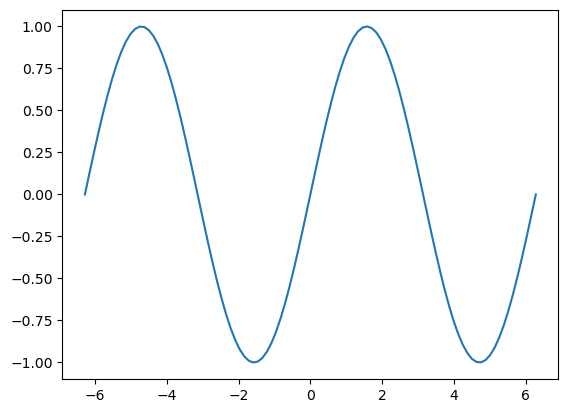

In [91]:
x = np.linspace(-2*pi, 2*pi, 100)   # create 100 values evenly spaced between -2pi and 2pi included
                                    # Note: pi is defined because we have imported everything from 
                                    #       the math module at the top of the notebook.

plt.plot(x, np.sin(x))
plt.show()  # what happens if this line is missing? Does the plot still appear?

#### We can add labels

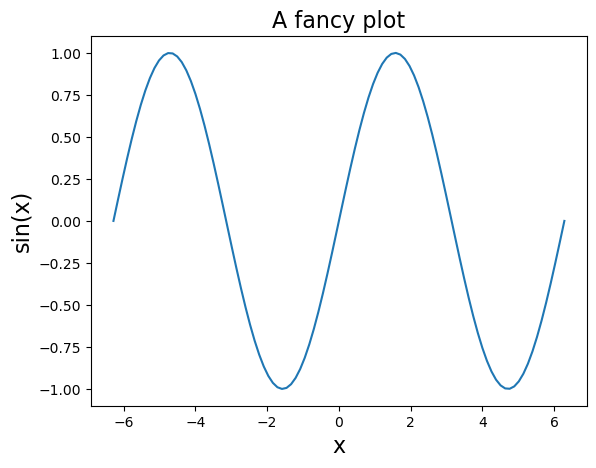

In [92]:
plt.plot(x, np.sin(x))
plt.title("A fancy plot", fontsize=16)
plt.xlabel("x", fontsize=16)
plt.ylabel("sin(x)", fontsize=16)
plt.show()

#### We can have multiple plots on one figure...

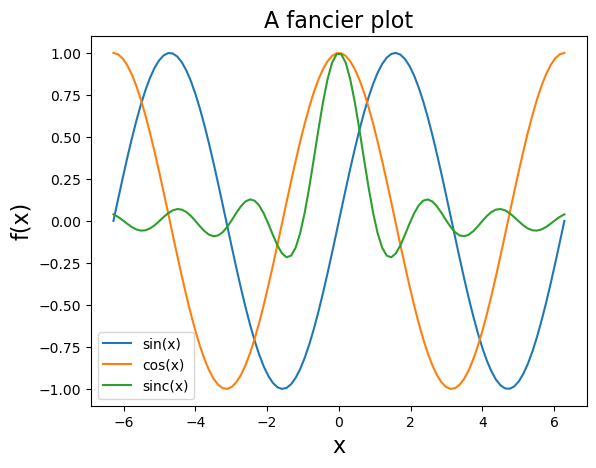

In [93]:
plt.plot(x, np.sin(x), x, np.cos(x), x, np.sinc(x))
plt.title("A fancier plot", fontsize=16)
plt.xlabel("x", fontsize=16)
plt.ylabel("f(x)", fontsize=16)
plt.legend(("sin(x)","cos(x)","sinc(x)"), fontsize=10)
plt.show()  

#### ...or multiple subplots in one figure.

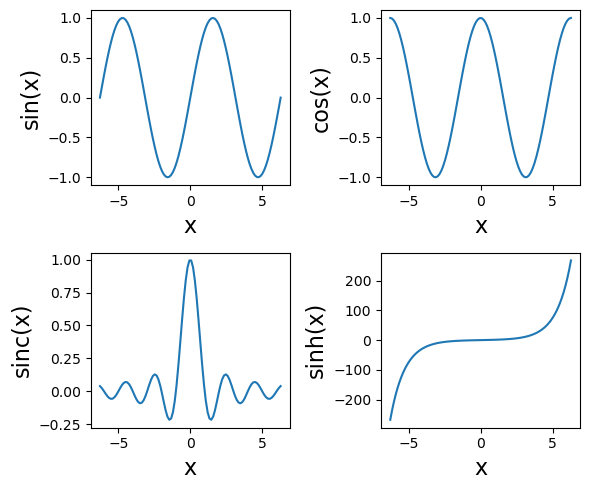

In [94]:
fig = plt.figure(figsize=(6, 5))

plt.subplot(221)
plt.plot(x, np.sin(x))
plt.xlabel("x", fontsize=16)
plt.ylabel("sin(x)", fontsize=16)

plt.subplot(222)
plt.plot(x, np.cos(x))
plt.xlabel("x", fontsize=16)
plt.ylabel("cos(x)", fontsize=16)

plt.subplot(223)
plt.plot(x, np.sinc(x))
plt.xlabel("x", fontsize=16)
plt.ylabel("sinc(x)", fontsize=16)

plt.subplot(224)
plt.plot(x, np.sinh(x))
plt.xlabel("x", fontsize=16)
plt.ylabel("sinh(x)", fontsize=16)

plt.tight_layout() # trims space between subplots
plt.show()

#### The recommended way to output multiple plots is to create axes objects.

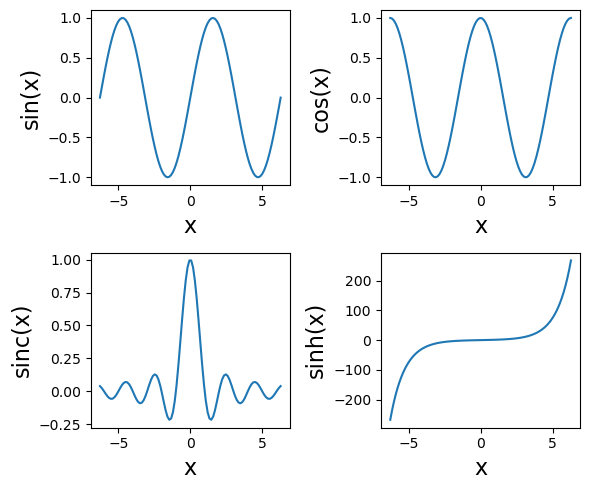

In [95]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 5))

axes[0,0].plot(x, np.sin(x))
axes[0,0].set_xlabel("x", fontsize=16)
axes[0,0].set_ylabel("sin(x)", fontsize=16)

axes[0,1].plot(x, np.cos(x))
axes[0,1].set_xlabel("x", fontsize=16)
axes[0,1].set_ylabel("cos(x)", fontsize=16)

axes[1,0].plot(x, np.sinc(x))
axes[1,0].set_xlabel("x", fontsize=16)
axes[1,0].set_ylabel("sinc(x)", fontsize=16)

axes[1,1].plot(x, np.sinh(x))
axes[1,1].set_xlabel("x", fontsize=16)
axes[1,1].set_ylabel("sinh(x)", fontsize=16)

fig.tight_layout() # trims space between subplots
plt.show()

### Scatter plots with `scatter`

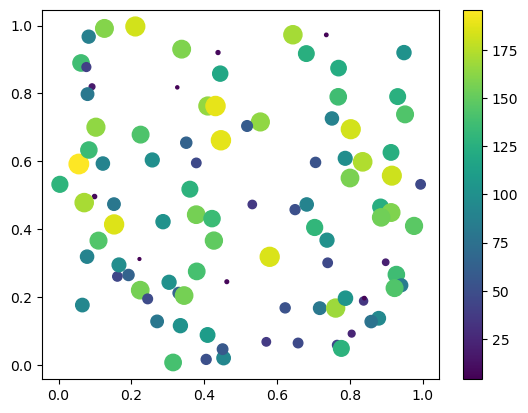

In [96]:
x, y , z = np.random.rand(3, 100)

size = abs(200*z+1).astype('int')

plt.scatter(x, y, marker='o', c=size, s=size)
plt.colorbar()
plt.show()

### Histogram plots with `hist`.

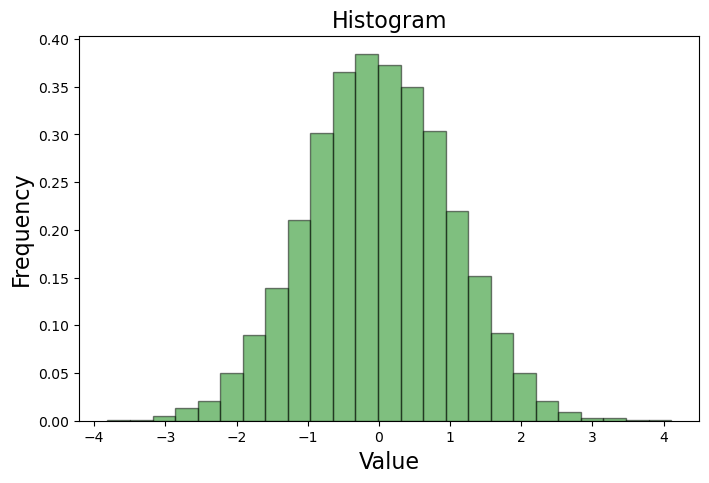

In [97]:
# standard normal distribution
A = np.random.randn(10000)

plt.figure(figsize=(8,5))
plt.hist(A, bins = 25, color='green', alpha=0.5, density=True, ec='k')
plt.title("Histogram", fontsize=16)
plt.xlabel("Value", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.show()

### Box plots with `boxplot`.

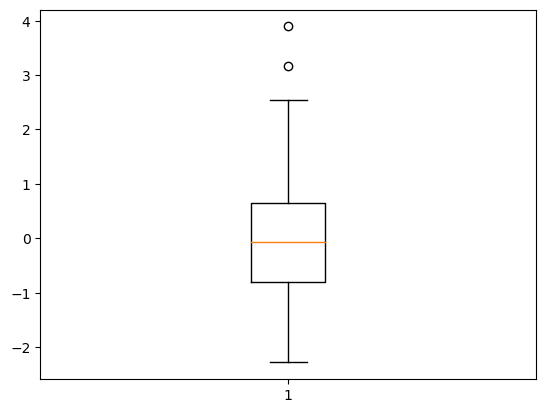

In [98]:
data = np.random.randn(100)
plt.boxplot(data)
plt.show()

<div>
<br>
<br>
<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1> Practice, Practice, Practice</h1>

<ol>
    
<li>Go through the notebook again and check that you have understood everything we have covered.</li><br>

<li>Do the tutorial problems that you can find on Canvas.</li><br>

<li> Have a look at the <a href="http://www.numpy.org/">official website for Numpy</a>.</li><br>

<li> Work through the numpy chapter of the <a href=http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/02.00-Introduction-to-NumPy.ipynb>Python Data Science Handbook</a></li><br>


<li>An outstanding online book on numpy is <a href="http://www.labri.fr/perso/nrougier/from-python-to-numpy/">From Python to Numpy by Nicolas P. Rougier</a>. You should check it out.</li><br>

<li>Visit the main <a href="http://matplotlib.org/index.html">Matplotlib webpage</a>. See also the <a href="http://matplotlib.org/gallery.html">gallery</a>.</li><br>

<li> Work through the numpy chapter of the <a href="http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.00-Introduction-To-Matplotlib.ipynb">Python Data Science Handbook</a> by Jake VanderPlas.</li><br>

<li> One of the most useful community-based websites for Python (and all things computing) is <b>StackOverflow</b>. <br>
Go over to <a href="http://stackoverflow.com/questions/tagged/python">http://stackoverflow.com/questions/tagged/python</a> and check it out. This is one of the most useful resources
for programming questions, the community sourced answers are often more illuminating than the official Python documentation.
The easiest way to find an answer is to Google it and look for links from StackOverflow. 


<p>(There are StackOverflow sites for virtually every programming languages and StackExchange websites for mathematics, statistics, $\LaTeX$, as well as <em>Motor Vehicle Maintenance and Repair</em>, <em>Politics</em>, and <em>Beer</em>... Go and see for yourself... The link is <a href="http://stackexchange.com/sites">http://stackexchange.com/sites</a>.)</p> </li><br>




</ol>


</div>

<div>
<br>
<br>
<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1> Above &amp; Beyond</h1>

<ul>
<li> Read <a href="http://ipython-books.github.io/featured-01">Getting the Best Performance out of NumPy</a> </li><br>
</ul>
</div>

> Material by Adel Rahmani